In [2]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
time_table_file = 'time_results.txt'

with open(time_table_file, 'r') as f:
    flines = [l.rstrip().split(', ') for l in f]

flines = [[int(n) if i == 0 else float(n) for i, n in enumerate(line)] for line in flines[1:]]

n, numpy_time, pytorch_time, numba_time, parallel_numba_time, cuda_numba_time, c_time, parallel_c_time = [
        [flines[k][i] for k in range(len(flines))]
        for i in range(len(flines[0]))
]

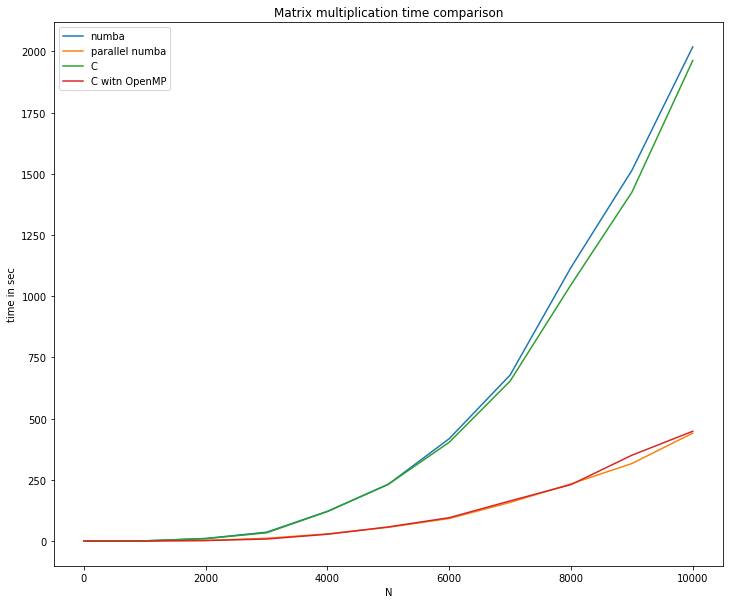

In [8]:
plt.figure(figsize=(12, 10))

# plt.plot(n, numpy_time, label='numpy', linewidth=4)
plt.plot(n, numba_time, label='numba', linewidth=4)
plt.plot(n, parallel_numba_time, label='parallel numba', linewidth=4)
# plt.plot(n, cuda_numba_time, label='numba with CUDA', linewidth=4)
plt.plot(n, c_time, label='C', linewidth=4)
plt.plot(n, parallel_c_time, label='C witn OpenMP', linewidth=4)

plt.xlabel('N', fontsize=15)
plt.ylabel('time in sec', fontsize=15)

plt.legend(fontsize=15)
plt.title('Matrix multiplication time comparison', fontsize=15)

plt.tick_params(labelsize=15)

plt.savefig('mm_time_comparison.png', dpi=1500, transparent=True)

plt.show()

In [25]:
import numba

@numba.jit(nopython=True, parallel=True)
def matrix_product(a, b):
    res = np.zeros((len(a), len(b)), dtype=np.float32)

    for i in numba.prange(len(a)):
        for j in range(len(b)):
            s = 0
            for k in range(len(a[i])):
                s += a[i][k] * b[k][j]

    return res

In [27]:
from timeit import default_timer as time
from tqdm.notebook import tqdm

time_series_pnumba = []
n_series = list(range(5, 101)) + [150, 200, 250, 350, 400, 450, 500]
K = 5

for n in tqdm(n_series):
    a = np.random.rand(n, n).astype(np.float32)
    b = np.random.rand(n, n).astype(np.float32)
    start_time = time()
    for _ in range(K):
        c = matrix_product(a, b)
    finish_time = time()
    mm_time = (finish_time - start_time) / K
    time_series_pnumba.append(mm_time)

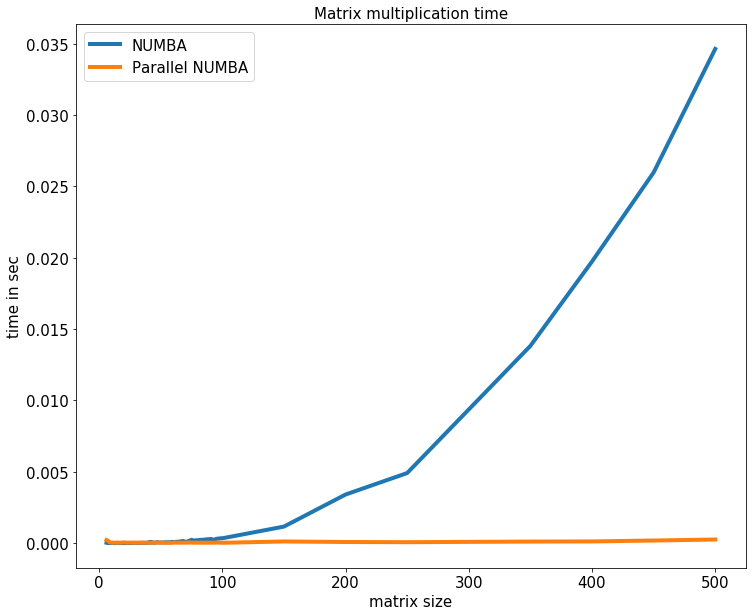

In [28]:
plt.figure(figsize=(12, 10))
# plt.plot(n_series, time_series, label='Python', linewidth=4)
plt.plot(n_series[1:], time_series_numba[1:], label='NUMBA', linewidth=4)
plt.plot(n_series[1:], time_series_pnumba[1:], label='Parallel NUMBA', linewidth=4)

plt.xlabel('matrix size', fontsize=15)
plt.ylabel('time in sec', fontsize=15)

plt.legend(fontsize=15)
plt.title('Matrix multiplication time', fontsize=15)

plt.tick_params(labelsize=15)

plt.savefig('parallel_numba_mm_time.png', dpi=1500, transparent=True)

plt.show()